In [7]:
import os
os.chdir("/Users/jrpark/PythonProjects/KAMP_casting")

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

from src.data import read_data

In [8]:
def str_to_date(s):
    try:
        s = datetime.strptime(s, "%Y-%m-%d %p %I:%M:%S")
    except ValueError:
        if ":" in s:
            s = datetime.strptime(s, "%Y-%m-%d %H:%M:%S")
        else:
            s = datetime.strptime(s, "%Y-%m-%d")
    return s

def change_dtype_of_datecol(date_col_series):
    date_col_series = date_col_series.apply(
        lambda s: s.replace("오전","AM").replace("오후","PM")
    )    
    date_col_series = date_col_series.apply(str_to_date)
    return date_col_series

def prepare_building61():
    data1 = read_data(data_filename="61번_파트1.csv")
    data2 = read_data(data_filename="61번_파트2.csv")
    data3 = read_data(data_filename="61번_MAIN.csv")

    for d in [data1, data2, data3]:
        d['일시'] = change_dtype_of_datecol(d['일시'])

    df = pd.merge(data1, data2, how='outer', on='일시')
    df = pd.merge(df, data3, how='outer', on='일시')

    df = df.set_index('일시')
    df = df.sort_index()
    df.index.name = 'date'

    df.columns = ['PART1','PART2','MAIN']
    df = df.diff(1)
    df = df.astype(float)
    return df

def plot_building61(df):
    # s = pd.to_datetime("2021-10-21")
    # w = pd.Timedelta("24h")
    # e = s + w
    # df.loc[s:e].plot(figsize=(15,7),grid=True,ylim=(0,1e4),marker='o')
    df.plot(figsize=(15,7),grid=True,ylim=(0,1e4),marker='o')
    return None

def main():
    df = prepare_building61()
    plot_building61(df)


data_path: /Users/jrpark/PythonProjects/KAMP_casting/data/61번_파트1.csv
data_path: /Users/jrpark/PythonProjects/KAMP_casting/data/61번_파트2.csv
data_path: /Users/jrpark/PythonProjects/KAMP_casting/data/61번_MAIN.csv


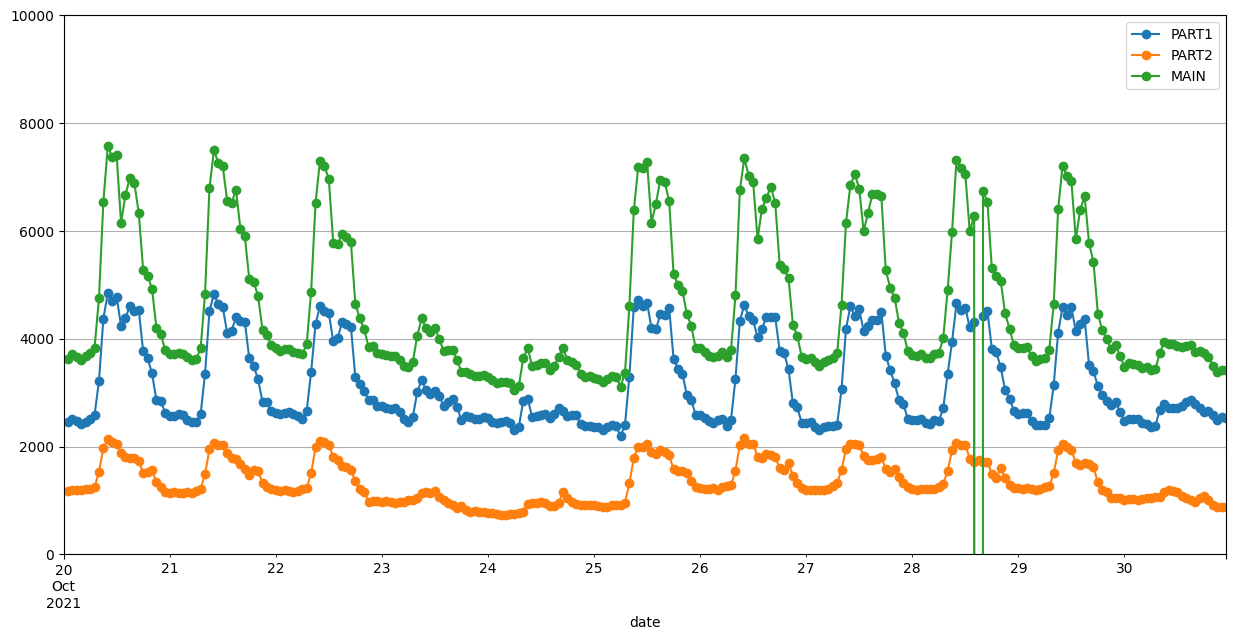

In [9]:
main()